In [1]:
# Single marker genes simulation
# Nicol, P.B. and Miller, J.W. (2023). Model-based dimensionality reduction for single-cell RNA-seq using generalized bilinear models. bioRxiv


import pandas as pd
import numpy  as np

 
from pathlib import Path


from scipy.stats import poisson 
from scipy.sparse import *

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


pd.set_option('display.max_columns', 5)

 
np.random.seed(seed=12345)

In [2]:
#### user specified

data_folder = "D:/analyze_Pearson_residuals/"

data_subfolder = "examples"

data_path = Path ( data_folder + data_subfolder )


import sys
sys.path.append( data_folder )

from  nru_DE import *

In [3]:
# output plots
counts_jpg = data_subfolder + "_counts.jpg"
residuals_jpg = data_subfolder + "_residuals.jpg"
PCA_scores_jpg = data_subfolder + "PCA_scores.jpg"

# paths: output plots
counts_dsn = data_path / counts_jpg
residuals_dsn = data_path / residuals_jpg
PCA_scores_dsn = data_path / PCA_scores_jpg  

In [4]:
pctl_list = [.01,.05, .10, .25, .5, .75, .90, .95, .99 ]				

In [5]:
n_cells_per_type = 333

cell_ID_list = list (  range( 3*n_cells_per_type ) )
cell_types_list = 333*['A'] + 333*['B'] + 333*['C']
df_cell_types = pd.DataFrame.from_dict ( {'cell': cell_ID_list, 'cell_type':cell_types_list } ).set_index(['cell'] )
print ( '\n\n df_cell_types:' )
print ( '\n', df_cell_types )



 df_cell_types:

      cell_type
cell          
0            A
1            A
2            A
3            A
4            A
...        ...
994          C
995          C
996          C
997          C
998          C

[999 rows x 1 columns]


In [6]:
gene_0_list = []

for i in range ( n_cells_per_type ):  
  gene_0_list.append ( poisson.rvs( 10 ) )

for i in range ( n_cells_per_type, 3*n_cells_per_type ):  
  gene_0_list.append ( poisson.rvs( 1 ) )  


gene_1_list = []

for i in range ( n_cells_per_type ):  
  gene_1_list.append ( poisson.rvs( 1 ) )

for i in range ( n_cells_per_type, 2*n_cells_per_type ):  
  gene_1_list.append ( poisson.rvs( 50 ) )  

for i in range ( 2*n_cells_per_type, 3*n_cells_per_type ):  
  gene_1_list.append ( poisson.rvs( 1 ) )  

  
df_counts_transpose_genes_0_1 = pd.DataFrame.from_dict ( {'cell': cell_ID_list, 0:gene_0_list, 1:gene_1_list } ).set_index(['cell'] )

In [7]:
df_counts_transpose_genes_2_999_list = []

for gene in range(2,1000):  
  gene_list = []
  for i in  cell_ID_list:  
    gene_list.append ( poisson.rvs( 1 ) )    
  df_counts_transpose_gene = pd.DataFrame.from_dict ( {'cell': cell_ID_list, gene:gene_list } ).set_index(['cell'] )
  df_counts_transpose_genes_2_999_list.append ( df_counts_transpose_gene )

df_counts_transpose = pd.concat ( [ df_counts_transpose_genes_0_1 ] + df_counts_transpose_genes_2_999_list, axis=1 ) 	
print ( '\n\n df_counts_transpose:' )
print ( '\n', df_counts_transpose )
  
 
df_counts_transpose_append_cell_type = pd.concat ( [ df_cell_types, df_counts_transpose ], axis=1 ) 
print ( '\n\n df_counts_transpose_append_cell_type:' )
print ( '\n', df_counts_transpose_append_cell_type )

 
df_desc_gb = df_counts_transpose_append_cell_type.groupby ( ['cell_type' ] ).describe ( percentiles=pctl_list ).transpose().reset_index() 
print ( '\n\n distribution of counts for each gene:  ' )
print ( '\n', df_desc_gb )
 
for gene in range (3): 
  df_desc_gb_gene_0 = df_desc_gb[ df_desc_gb['level_0'] ==gene ].drop( columns=['level_0'] ).set_index( ['level_1'] ) 
  print ( '\n\n distribution of counts for gene ', gene,':' )
  print ( '\n', df_desc_gb_gene_0 ) 



 df_counts_transpose:

       0    1    ...  998  999
cell            ...          
0      16    4  ...    0    1
1       7    0  ...    1    1
2      11    3  ...    4    0
3      18    0  ...    0    1
4      12    1  ...    3    1
...   ...  ...  ...  ...  ...
994     1    3  ...    1    0
995     1    2  ...    1    0
996     1    1  ...    1    0
997     0    0  ...    0    2
998     0    2  ...    1    1

[999 rows x 1000 columns]


 df_counts_transpose_append_cell_type:

      cell_type   0  ...  998  999
cell                ...          
0            A  16  ...    0    1
1            A   7  ...    1    1
2            A  11  ...    4    0
3            A  18  ...    0    1
4            A  12  ...    3    1
...        ...  ..  ...  ...  ...
994          C   1  ...    1    0
995          C   1  ...    1    0
996          C   1  ...    1    0
997          C   0  ...    0    2
998          C   0  ...    1    1

[999 rows x 1001 columns]


 distribution of counts for each gene:  

 

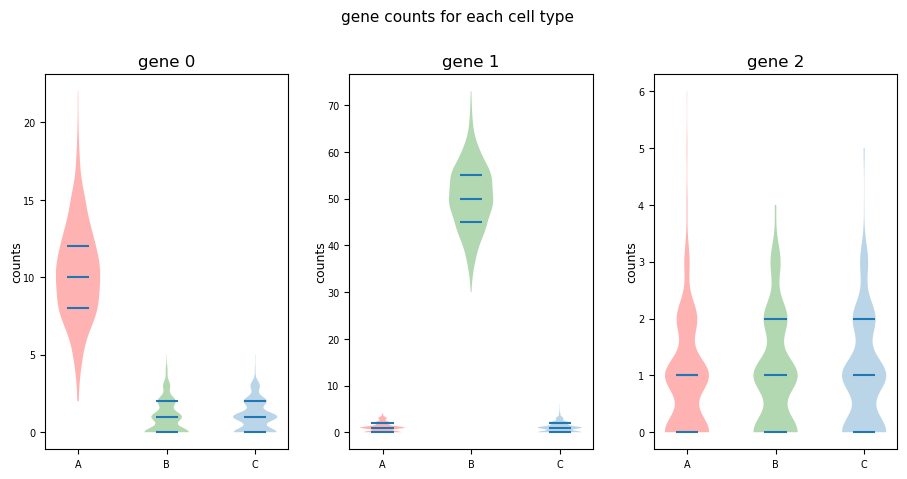

In [8]:
cell_type_list = ['A', 'B', 'C']
n_groups = 3

title1 = "gene counts for each cell type" 

fig, ax_tuple  = plt.subplots(1,3, figsize=( 11, 5 ) )

suptitl = title1
plt.suptitle ( suptitl, fontsize=11 )
  

for gene in range(3):  

  boxplot_list= []
  for cell_type in cell_type_list:
    boxplot_list.append ( df_counts_transpose_append_cell_type[ gene ].loc [ df_counts_transpose_append_cell_type['cell_type'] == cell_type ].values.tolist() )

  ax=ax_tuple[ gene ] 
  
  violin_parts = ax.violinplot( boxplot_list , showextrema = False,   showmedians = True, quantiles= n_groups* [[.25,.75]] ) 
  pc = violin_parts['bodies'][0]
  pc.set_facecolor('red') 
  pc = violin_parts['bodies'][1]
  pc.set_facecolor('green') 
 
 
  ax.set_title('gene ' + str(gene) )
  ax.set_xticks( list ( range ( 1,  1 + n_groups ) ) )

  ax.tick_params(labelsize=7)   
  ax.set_xticklabels( cell_type_list, fontsize=7 )  

  ax.set_ylabel ( 'counts',fontsize=9, labelpad=-0.10 )		


plt.subplots_adjust( bottom=0.1, top=0.85, wspace=0.25 )  
  
plt.savefig( counts_dsn, transparent=True, dpi=300 ) 

In [9]:
arr_counts_dense = df_counts_transpose.transpose().values
print ( '\n\n arr_counts_dense.shape:' )
print ( '\n', arr_counts_dense.shape )  
  
arr_counts_sparse = csr_matrix( arr_counts_dense ) 
print ( '\n\n arr_counts_sparse:' )
print ( '\n', arr_counts_sparse )  
   
df_counts_sparse = pd.DataFrame.sparse.from_spmatrix( arr_counts_sparse, index= df_counts_transpose.columns.values.tolist(), columns= df_counts_transpose.index.values.tolist()  ).astype(int)
print ( '\n\n df_counts_sparse:' )
print ( '\n', df_counts_sparse )  



 arr_counts_dense.shape:

 (1000, 999)


 arr_counts_sparse:

   (0, 0)	16
  (0, 1)	7
  (0, 2)	11
  (0, 3)	18
  (0, 4)	12
  (0, 5)	8
  (0, 6)	18
  (0, 7)	11
  (0, 8)	10
  (0, 9)	9
  (0, 10)	13
  (0, 11)	15
  (0, 12)	10
  (0, 13)	11
  (0, 14)	13
  (0, 15)	13
  (0, 16)	7
  (0, 17)	10
  (0, 18)	12
  (0, 19)	10
  (0, 20)	11
  (0, 21)	10
  (0, 22)	9
  (0, 23)	11
  (0, 24)	6
  :	:
  (999, 959)	1
  (999, 960)	1
  (999, 962)	2
  (999, 964)	3
  (999, 966)	1
  (999, 967)	2
  (999, 968)	1
  (999, 970)	1
  (999, 971)	2
  (999, 972)	3
  (999, 973)	2
  (999, 975)	1
  (999, 977)	2
  (999, 978)	1
  (999, 981)	1
  (999, 983)	3
  (999, 984)	4
  (999, 985)	2
  (999, 986)	3
  (999, 987)	2
  (999, 988)	1
  (999, 989)	2
  (999, 992)	1
  (999, 997)	2
  (999, 998)	1


 df_counts_sparse:

      0    1    ...  997  998
0     16    7  ...    0    0
1      4    0  ...    0    2
2      5    1  ...    1    2
3      0    0  ...    0    4
4      3    1  ...    2    1
..   ...  ...  ...  ...  ...
995    0    0  ... 

In [10]:
nru_dict = nru ( df_counts_sparse )

df_gene_stats = nru_dict['df_gene_stats'].sort_values ( ['A_g'], ascending=False )
print ( '\n\n df_gene_stats ranked by descending adjusted mean SSQ of Pearson residuals:' )
print ( '\n', df_gene_stats[['count', 'nz_cells', 'M_g', 'A_g']] )  

print ( '\n\n distribution of gene statistics:' )
print (  '\n', df_gene_stats[['count', 'nz_cells', 'M_g', 'A_g']].describe ( percentiles=pctl_list ) )

counts_sparse_selected_genes.shape:  (1000, 999)
counts_sparse_selected_csr.shape:  (1000, 999)
calculating sum of squares of Pearson residuals using all cells
calculating sum of squares of Pearson residuals using cell sample  0
calculating sum of squares of Pearson residuals using cell sample  1
calculating sum of squares of Pearson residuals using cell sample  2
calculating sum of squares of Pearson residuals using cell sample  3
calculating sum of squares of Pearson residuals using cell sample  4
calculating sum of squares of Pearson residuals using cell sample  5
calculating sum of squares of Pearson residuals using cell sample  6
calculating sum of squares of Pearson residuals using cell sample  7
calculating sum of squares of Pearson residuals using cell sample  8
calculating sum of squares of Pearson residuals using cell sample  9
calculating sum of squares of Pearson residuals using cell sample  10
calculating sum of squares of Pearson residuals using cell sample  11
calculatin



 df_residuals:

           0         1    ...       997       998
0    6.003150  1.600059  ... -1.952796 -2.009352
1   -3.168604 -4.062681  ... -4.039435 -3.675240
2    4.080446  0.062369  ...  0.073852  1.025138
3   -0.997601 -0.979969  ... -0.974362  2.987120
4    1.951555  0.011368  ...  1.034332 -0.034258
..        ...       ...  ...       ...       ...
995 -0.970223 -0.953076  ... -0.947622 -0.975067
996 -0.984753  0.066404  ...  0.077888  2.041644
997  0.076209  0.111912  ...  1.187014  1.099912
998 -1.002498  0.030675  ... -0.979146 -0.014950
999  0.023683  0.059354  ...  1.106882  0.013722

[1000 rows x 999 columns]


 df_DE_stats:

           H_stat        p_value
gene                           
0     682.513693  6.223500e-149
1     666.315204  2.048763e-145
2      25.003440   3.720249e-06
3      24.089088   5.876530e-06
4      41.467951   9.893473e-10
...          ...            ...
995    32.945423   7.014428e-08
996    19.598112   5.550397e-05
997    54.350342   1.577514e

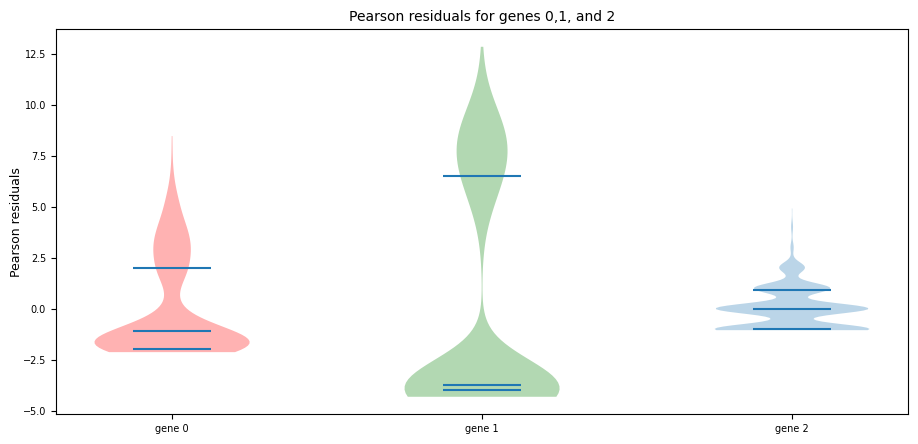

In [11]:
df_residuals = nru_dict['df_residuals']
print ( '\n\n df_residuals:' )
print ( '\n', df_residuals )  


df_DE_stats = DE_H_stats ( df_residuals, df_cell_types.rename ( columns = {'cell_type':'Cluster'} ) )
print ( '\n\n df_DE_stats:' )
print ( '\n', df_DE_stats )  



gene_list = list( range(3) ) 

n_groups = 3

title1 = "Pearson residuals for genes 0,1, and 2"
fig, ax  = plt.subplots(  figsize=( 11, 5 ) )

suptitl = title1
ax.set_title ( title1, fontsize=10 )
  

boxplot_list= []
  
for gene in gene_list:  
  boxplot_list.append ( df_residuals.loc[ gene ].values.tolist() )
  
violin_parts = ax.violinplot( boxplot_list , showextrema = False, showmedians = True, quantiles= n_groups* [[.25,.75]] ) 
pc = violin_parts['bodies'][0]
pc.set_facecolor('red') 
pc = violin_parts['bodies'][1]
pc.set_facecolor('green') 
 
ax.set_xticks( list ( range ( 1,1 + n_groups ) ) )

ax.tick_params(labelsize=7) 
ax.set_xticklabels( ['gene 0', 'gene 1', 'gene 2'], fontsize=7 )

ax.set_ylabel ( 'Pearson residuals',fontsize=9, labelpad=-0.20 )		

  
plt.savefig( residuals_dsn, transparent=True, dpi=300 ) 



 pca.singular_values_:

 [182.14415061  74.73696848]


 df_PCA_scores:

         nru_1     nru_2 cell_type
0   -0.023042  0.060444         A
1   -0.024487  0.016806         A
2   -0.023579  0.025058         A
3   -0.031050  0.073583         A
4   -0.027647  0.028817         A
..        ...       ...       ...
994 -0.018913 -0.033833         C
995 -0.019105 -0.037339         C
996 -0.019306 -0.030246         C
997 -0.019298 -0.045980         C
998 -0.015621 -0.068985         C

[999 rows x 3 columns]


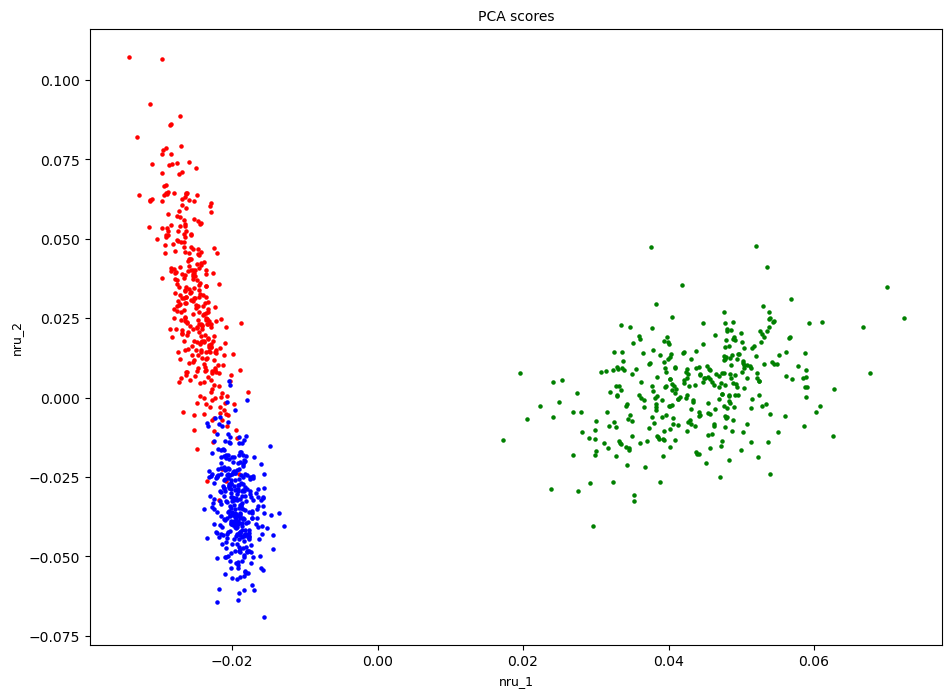

In [12]:
arr_residuals = df_residuals.values
pca = PCA( n_components=2 )
pca.fit ( arr_residuals )

print ( '\n\n pca.singular_values_:' )
print ( '\n', pca.singular_values_ )

arr_pca_scores = pca.components_ 
df_PCA_scores = pd.DataFrame ( index = cell_ID_list, data = np.transpose ( arr_pca_scores ), columns = ['nru_1', 'nru_2' ] ) 
df_PCA_scores['cell_type'] = cell_types_list
print ( '\n\n df_PCA_scores:' )
print ( '\n', df_PCA_scores )  
 

title1 = "PCA scores" 

fig, ax  = plt.subplots( figsize=( 11, 8 ) )

color_list = ['red', 'green', 'blue']
ax.set_title ( title1, fontsize=10 )
  
for n_cell_types in range(3):
  df_PCA_scores_sel = df_PCA_scores.loc [ df_PCA_scores['cell_type'] == cell_type_list[n_cell_types] ]

  ax.scatter ( df_PCA_scores_sel['nru_1'], df_PCA_scores_sel['nru_2'], s=5, color = color_list[ n_cell_types ] )  
 
ax.set_xlabel ( 'nru_1',fontsize=9  )	
ax.set_ylabel ( 'nru_2',fontsize=9  )		

plt.savefig( PCA_scores_dsn, transparent=True, dpi=300 ) 